In [2]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
    

## 🔹 Carga de Datos

In [3]:

csv_path = r"C:\Users\Juan Diego\Downloads\propiedades_limpias.csv"
df = pd.read_csv(csv_path)

print("Primeras filas del DataFrame original:")
df.head()
    

Primeras filas del DataFrame original:


,id,camaras,area,precio,habitaciones,banos,tamano,parqueos
0,2821389,34,15,1850.0,3,3.5,341,2
1,2816041,11,Santa Catarina Pinula,950.0,2,1.5,119,2
2,2810458,45,14,2100.0,2,2,290,2
3,2806268,45,14,1800.0,2,2,125,2
4,2801852,9,16,3800.0,3,3.5,339,4


## 🔹 Conversión y Limpieza de Datos

In [4]:

cols_to_convert = ['habitaciones', 'banos', 'parqueos', 'tamano', 'precio']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover valores nulos
df.dropna(subset=cols_to_convert, inplace=True)
    

## 🔹 Aplicación de Filtros

In [5]:

precio_maximo = 100000
tamano_maximo = 600
parqueos_maximo = 6

df_filtrado = df[(df['precio'] <= precio_maximo) &
                 (df['tamano'] <= tamano_maximo) &
                 (df['parqueos'] <= parqueos_maximo)]

print(f"Propiedades después de filtros: {len(df_filtrado)} filas")
df_filtrado.head()
    

Propiedades después de filtros: 351 filas


,id,camaras,area,precio,habitaciones,banos,tamano,parqueos
0,2821389,34,15,1850.0,3,3.5,341.0,2
1,2816041,11,Santa Catarina Pinula,950.0,2,1.5,119.0,2
2,2810458,45,14,2100.0,2,2.0,290.0,2
3,2806268,45,14,1800.0,2,2.0,125.0,2
4,2801852,9,16,3800.0,3,3.5,339.0,4


## 🔹 Función de Regresión Lineal Simple

In [6]:

def simple_linear_regression(df, independent_var, dependent_var='precio'):
    df_temp = df[[independent_var, dependent_var]].dropna()
    
    X = sm.add_constant(df_temp[independent_var])
    y = df_temp[dependent_var]
    
    model = sm.OLS(y, X).fit()
    print(model.summary())
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df_temp[independent_var], y=y, alpha=0.7)
    plt.plot(df_temp[independent_var], model.predict(X), color='red')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.title(f'Regresión lineal: {dependent_var} vs {independent_var}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return model
    

## 🔹 Regresión para cada Variable

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     24.45
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           1.19e-06
Time:                        18:19:58   Log-Likelihood:                -3247.4
No. Observations:                 351   AIC:                             6499.
Df Residuals:                     349   BIC:                             6507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           73.9314    424.464      0.174   

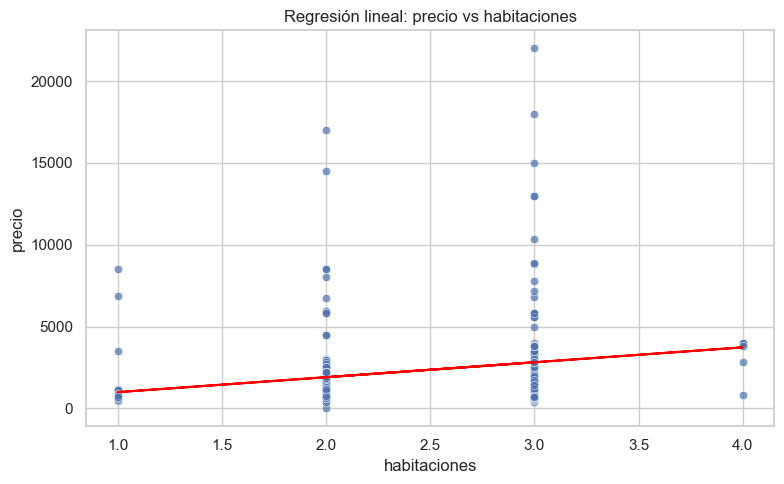

In [7]:

# Regresión para 'habitaciones'
model_habitaciones = simple_linear_regression(df_filtrado, 'habitaciones')
    

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     22.46
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           3.12e-06
Time:                        18:19:58   Log-Likelihood:                -3248.3
No. Observations:                 351   AIC:                             6501.
Df Residuals:                     349   BIC:                             6508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        293.8340    397.236      0.740      0.4

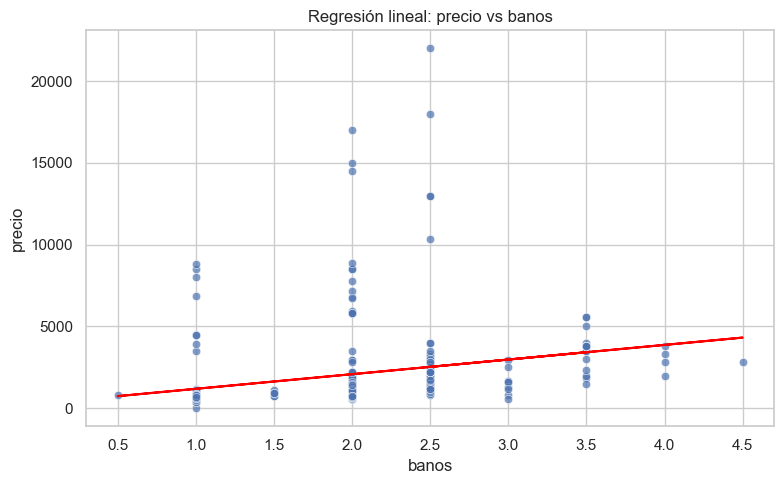

In [8]:

# Regresión para 'banos'
model_banos = simple_linear_regression(df_filtrado, 'banos')
    

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     18.17
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.60e-05
Time:                        18:19:58   Log-Likelihood:                -3250.4
No. Observations:                 351   AIC:                             6505.
Df Residuals:                     349   BIC:                             6512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        524.4052    385.937      1.359      0.1

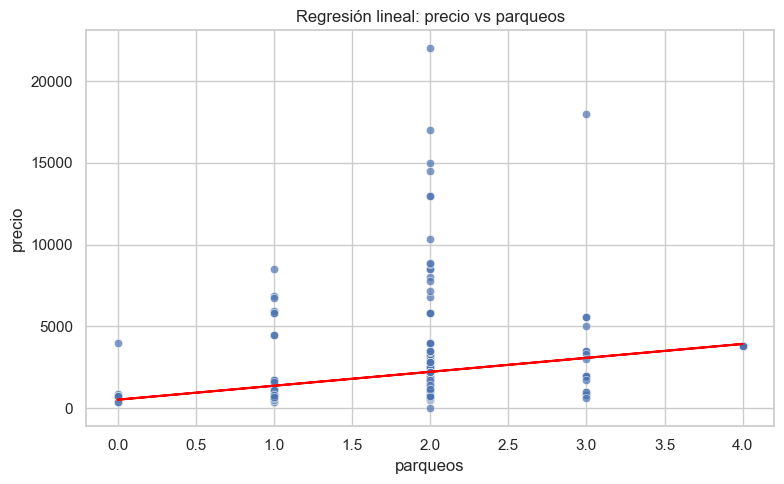

In [9]:

# Regresión para 'parqueos'
model_parqueos = simple_linear_regression(df_filtrado, 'parqueos')
    

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     22.83
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.61e-06
Time:                        18:19:58   Log-Likelihood:                -3248.2
No. Observations:                 351   AIC:                             6500.
Df Residuals:                     349   BIC:                             6508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1083.2369    245.814      4.407      0.0

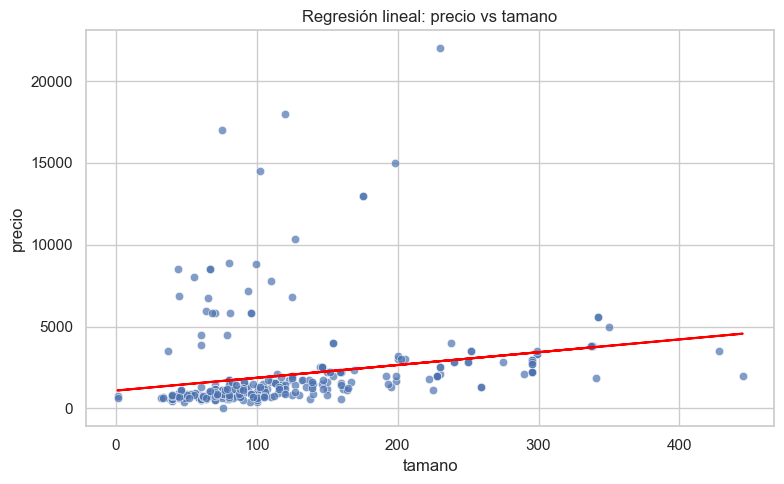

In [10]:

# Regresión para 'tamano'
model_tamano = simple_linear_regression(df_filtrado, 'tamano')
    

## 🔹 Guardar Resultados

In [11]:

df_filtrado.to_csv("propiedades_filtradas.csv", index=False)
print("Archivo guardado exitosamente como 'propiedades_filtradas.csv'")
    

Archivo guardado exitosamente como 'propiedades_filtradas.csv'
